In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):

    if narr.dtype != 'bool':
        raise ValueError('narr must be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'blue'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [17]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [0]
    for i in range(niter):
        p = value(current, **kwargs)
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(round(np.sum(current)))
    
    return post[nburn:], current

In [62]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()


def proposal(current, i, **kwargs):
    _ = kwargs
    i = np.random.choice(8,2)
    
    pos=0
    if i[0]!=0:
        pos+=current[i[0]-1][i[1]]
    if i[0]!=7:
        pos+=current[i[0]+1][i[1]]
    if i[1]!=0:
        pos+=current[i[0]][i[1]-1]
    if i[1]!=7:
        pos+=current[i[0]][i[1]+1]
    
    if pos==0:
        current[i[0]][i[1]] = 1
    else:
        current[i[0]][i[1]] = 0
    return current

size = 8

post, current = metroplis(np.zeros((8,8)), value, proposal, 100000)

1. Оценить  En(ξ)  с помощью МСМС для графа 8х8

In [21]:
print("Оценка количества закрашенных вершин в графе: ")
print(sum(post)/len(post))

Оценка количества закрашенных вершин в графе: 
15.357976420235797


2. Обосновать численно и графически стационарность

In [30]:
def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

Ttest_indResult(statistic=1.128861196421157, pvalue=0.2589704318561845)

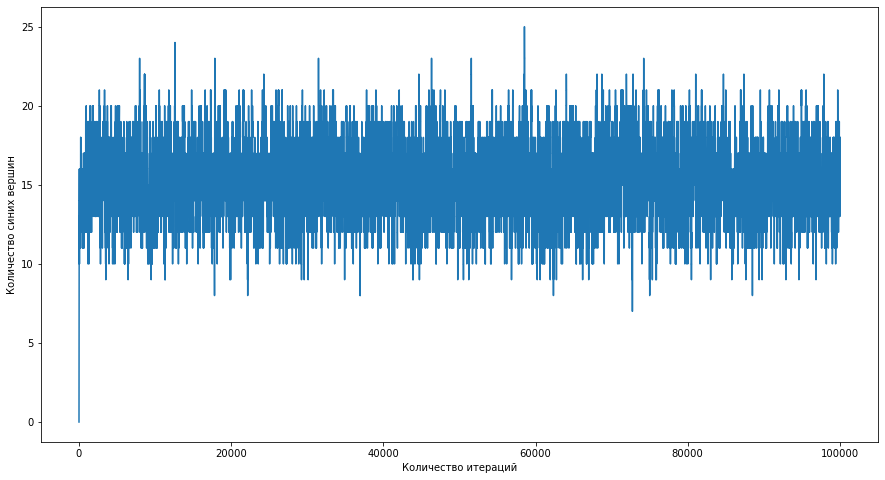

In [52]:
from scipy import stats

plt.figure(figsize=(15,8))

plt.plot(post)
plt.ylabel("Количество синих вершин")
plt.xlabel("Количество итераций")



g_test(post[3000:100000])

Стационарность подтвердилась

3. Построить график распределеиня  n(ξ)

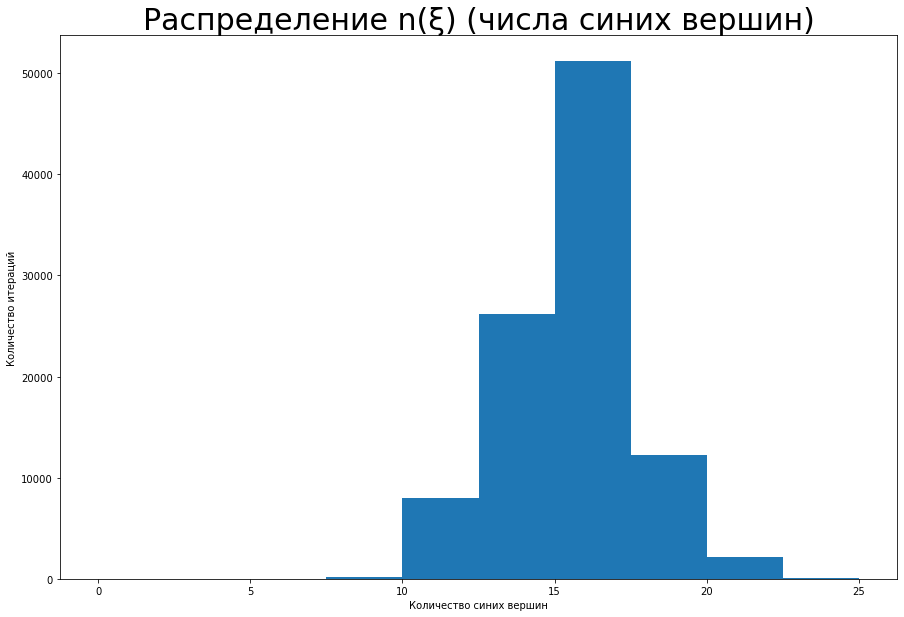

In [59]:
plt.figure(figsize=(15,10))
plt.hist(post)
plt.title("Распределение n(ξ) (числа синих вершин)", size = 30)
plt.xlabel("Количество синих вершин")
plt.ylabel("Количество итераций")
plt.show()

4. Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

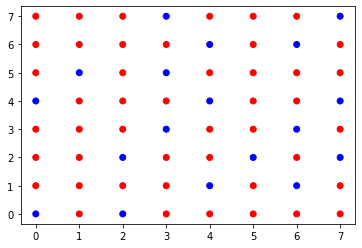

In [61]:
plot_grid(current.astype('bool'))